In [2]:
%cd ..

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   Unnamed: 0  seed  hidden_channels   mu  train_acc  val_acc  test_acc  \
0           0     0                1  0.0     0.4429    0.342     0.335   
1           1     0                1  0.1     0.4429    0.344     0.343   
2           2     0                1  0.2     0.4571    0.346     0.339   
3           3     0                1  0.3     0.4857    0.352     0.341   
4           4     0                1  0.4     0.4929    0.352     0.346   

     icd0      icd3  
0  0.5699  0.364966  
1  0.5357  0.363067  
2  0.5209  0.361455  
3  0.4678  0.359196  
4  0.4645  0.359630  


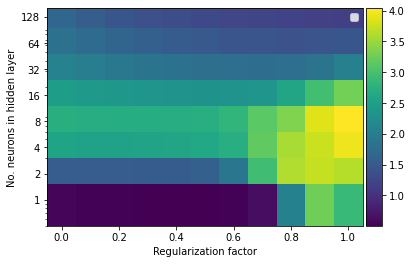

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


df = pd.read_csv('reports/figures/acc_on_mu_and_neurons.csv')
df['icd0'] = df['icd0'].apply(lambda l: float(l.split('(')[-1].split(')')[0]))
print(df.head())
# ridiculously slow implementation, but I don't want to figure this out now
arr = np.zeros((df['hidden_channels'].unique().shape[0], df['mu'].unique().shape[0]))
for ind_i, i in enumerate(df['hidden_channels'].unique()):
    for ind_j, j in enumerate(df['mu'].unique()):
        # print((df['hidden_channels'] == i) & (df['mu'] == j))
        # print(df[(df['hidden_channels'] == i) & (df['mu'] == j)]['test_acc'])
        arr[ind_i,ind_j] = df[(df['hidden_channels'] == i) & (df['mu'] == j)]['icd0'].mean()
# plt.pcolormesh()



fig, ax = plt.subplots()
im = ax.pcolormesh([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.], [1, 2, 4, 8, 16, 32, 64, 128], arr, )
ax.set_yscale('log')
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128])
ax.set_yticklabels([1, 2, 4, 8, 16, 32, 64, 128])
add_colorbar(im, fig, ax)
ax.set(xlabel='Regularization factor', ylabel='No. neurons in hidden layer')
ax.legend()
plt.show()
